## Exercise 9

1. This is an experiment. The researches have set up control and test groups, and designed the study to see what effect late fines have on daycare pickups.
2. 10 daycare centers
3. The response variable is the number of pickups. (numerical / discrete)
4. The explanatory variables are groups (categorical / nominal), week (numerical / discrete), study_period (categorical / ordinal)

Bonus:

In [52]:
import polars as pl
import seaborn as sns

df = pl.read_csv('../data/daycare_fines.csv', infer_schema_length=0,
        dtypes={
            'center': pl.Int32,
            'groups': pl.Categorical,
            'children': pl.Int32,
            'week': pl.Int32,
            'late_pickups': pl.Int32,
            'study_period_4': pl.Categorical,
            'study_period_3': pl.Categorical,
        }
    )
df.describe()

describe,center,groups,children,week,late_pickups,study_period_4,study_period_3
str,f64,str,f64,f64,f64,str,str
"""count""",200.0,"""200""",200.0,200.0,200.0,"""200""","""200"""
"""null_count""",0.0,"""0""",0.0,0.0,0.0,"""0""","""0"""
"""mean""",5.5,null,33.7,10.5,12.8,null,null
"""std""",2.879489,null,2.28827,5.780751,6.959322,null,null
"""min""",1.0,null,28.0,1.0,2.0,null,null
"""25%""",3.0,null,33.0,6.0,8.0,null,null
"""50%""",6.0,null,34.0,11.0,12.0,null,null
"""75%""",8.0,null,35.0,16.0,16.0,null,null
"""max""",10.0,null,37.0,20.0,35.0,null,null


In [75]:
# Divide the number of late pickups week by 7 (assuming daycares are open 7 days a week) and the number of children registered at the daycares.
df = df.with_columns((pl.col('late_pickups') / pl.col('children') / 7).cast(pl.Float32).alias('late_rate'))

In [79]:
# Aggregate the late rates by week & groups
grouped = df.group_by('groups', 'week').agg(pl.mean('late_rate'))
# grouped.describe()

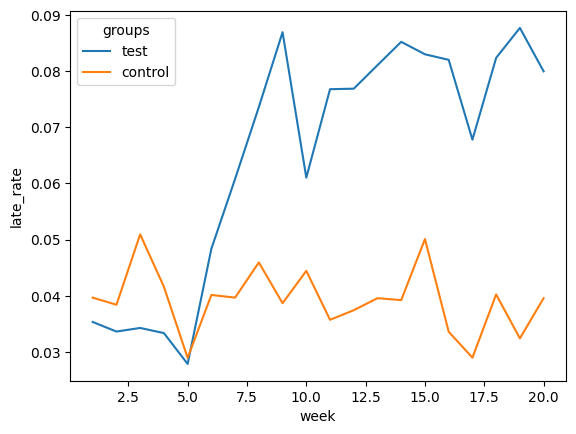

In [77]:
g = sns.lineplot(
    data=grouped,
    x='week',
    y='late_rate',
    hue='groups'
)

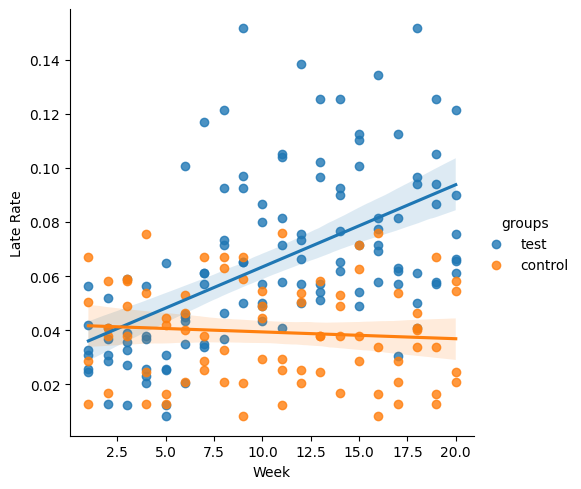

In [78]:
plot = sns.lmplot(
    data=df,
    x='week',
    y='late_rate',
    hue='groups'
).set_axis_labels('Week', 'Late Rate')